Ankith Dasu_Assignment 1: Neural Networks

## Classifying movie reviews:

### The IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In the below code chunk, we are creating layers for the modelHere, I have chosen 3 layers with only 64 nodes as the model overfits if there is another layer or choosing nodes higher than 64.

Unlike a sigmoid function that will map input values between 0 and 1, the Tanh will map values between -1 and 1.
The activation function tanh can be used as a non-linear activation function between layers of a neural network. 

Regularization has been implemented here while creating layers as it will impose the model with penalty in the to keep it as simple as possible. I have tried multiple weights and 0.005 seems to make the model as simple as possible.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

Binary cross entropy loss function measures the performance of a classification model whose output is a probability value between 0 and 1. It is preferred for classification, while mean squared error (MSE) is one of the best choices for regression.

MSE tells us how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line and squaring them. The squaring is necessary to remove any negative signs.

In [10]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

/* Here we have used an epoch of 20 which states that the model will be going over the data 20 times with a batch size of 512

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.8081 - accuracy: 0.7559 - val_loss: 0.5562 - val_accuracy: 0.8660
Epoch 2/20
30/30 [==============================] - 2s 61ms/step - loss: 0.4792 - accuracy: 0.8599 - val_loss: 0.3979 - val_accuracy: 0.8672
Epoch 3/20
30/30 [==============================] - 2s 60ms/step - loss: 0.3427 - accuracy: 0.8760 - val_loss: 0.2859 - val_accuracy: 0.8807
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2526 - accuracy: 0.8795 - val_loss: 0.2179 - val_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1907 - accuracy: 0.8908 - val_loss: 0.1974 - val_accuracy: 0.8445
Epoch 6/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1533 - accuracy: 0.8969 - val_loss: 0.1565 - val_accuracy: 0.8706
Epoch 7/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1294 - accuracy: 0.9089 - val_loss: 0.1735 - val_accuracy: 0.8252
Epoch 8/20
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

From the above 20 Epochs with a batch size of 512, a synopsis can be derived.

**Summary for Validation Loss function:**
(Activation function = tanh)
(Loss = MSE)


I have compared using loss functions MSE vs Binary Cross Entropy for different units(16,32,64) keeping the Activation Function 'tanh'(relu for few comparisons) and 3 layers.
I have used regularization for MSE with hyper parameter as (0.05)


**16 Nodes with 3 Layers. Binary Cross Entropy vs MSE (No regularization)(Activation func: tanh)**
In MSE the Valid loss started from 1.10 and decreased to 0.8 up until the 5th epoch and the loss kept increasing. The final loss persent is around 0.17. which is better than Binary CE. 
In Binary Cross entorpy model the Validation loss started from 0.31 and kept on decreasing till 4 epoch and then there is sharp rise in the loss as the epoch reaches to 20.
Summary: Here using MSE, we have got better solution i.e reduced loss function


----------------------------------------------------
**32 Nodes with 3 Layers. Binary Cross Entropy vs MSE (Using regularization)(Activation func: relu)**

Using relu is a bit tricky here.
For MSE, the validation loss recorded was around 0.13. There was a continual drop in the loss and validation loss. 
In the case for BCE the validation loss has reduced until 3 epochs and sharp and steady rise with the recorded value is at 100 % 


**32 Nodes with 3 Layers. Binary Cross Entropy vs MSE (Using regularization)(Activation func: tanh)**
The BCE validation loss started at 0.54 and then it decreased to 0.4 at epoch 20. There has been not much of a decrease. 
However for MSE model the loss rate started at the 0.5 and reduced to 0.19 and Validation loss started at 0.4 and has dropped to 0.19. 

With the usage of regularization for MSE with hyper parameter as (0.05), we can see that the models complexity has been descreased when compared to the models which does not have a regularization by checking the training loss which has been low at the end end of epoch iteration.the training and validation loss seems to be parallel to each other with some difference.

----------------------------------------------------

**64 Nodes with 3 Layers. Binary Cross Entropy vs MSE (Using regularization)(Activation func: relu)**

When i compared 16 and 32 nodes with 64, the usage of 64 nodes has been a bit efficient in reducing the validation loss. The initial loss starts around 0.2-0.3 which is better than models which has 32 or 16 nodes per layer. 
Using BCE, the loss has steadily increased from epoch 1 to epoch 20.
The loss for the MSE model fluctuates as the loss seems to be reduced at certain epoch and increases in the next and the same cycle continue till the end of epoch.

**64 Nodes with 3 Layers. Binary Cross Entropy vs MSE (Using regularization)(Activation func: tanh)**

Using BCE, The training loss started at 1.21 and reduced to 0.3. The loss here started at a very high point. There has not been much decrease in the Validation loss and it was observed to be 0.5 at epoch 20.
Using MSE, it is the same as relu which closely follow the uos and downs pattern, the model's loss is decreasing at lenght and same sharp increase as the epoch run




**Plotting the training and validation loss**

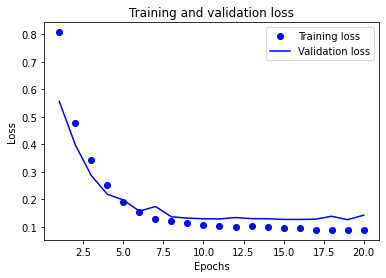

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

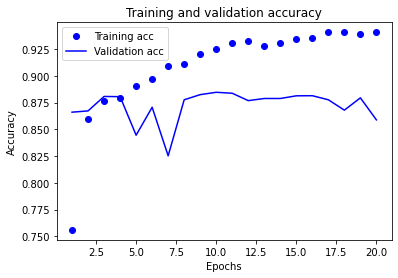

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Summary for Validation accuracy and training accuracy:

**16 Nodes, 3 layers (tanh) with regularization l2:**
The validation accuracy decreased from epoch 1 to epoch 20. The training accuracy however has been increased with every epoch. 


**32 Nodes, 3 layers (tanh) with regularization l2:**

Training accuracy increased steadily with max accuracy at 95.7%
Initially the validation accuracy seems to be decreased, then it has rised to 87% and after a series of ups and downs ended up to the same high point. 


**64 Nodes, 3 layers (tanh) with regularization l2:**

 Fluctuations can be noticed for validation accuracy here in this case. The training accuracy ended up being close to 93 % where as the validation accuracy for the models is around 88 %.  By this we can analyse that there is meaning full difference in the data which is used for training and the data used for validation. This can be avoided by using stratified sampling.



------------------------------------------------------------
From the above models with different layers and functions, I have observed that 
the model which has higher nodes seems to have stable model. The training accuracy for all these models remaines to be higher.Using more layers and loss function MSE, it has given me some optimal results

**Retraining a model from scratch**

In [16]:
model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=8, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/8
49/49 [==============================] - 3s 46ms/step - loss: 0.7583 - accuracy: 0.8308
Epoch 2/8
49/49 [==============================] - 2s 46ms/step - loss: 0.3664 - accuracy: 0.8913
Epoch 3/8
49/49 [==============================] - 2s 46ms/step - loss: 0.2345 - accuracy: 0.8965
Epoch 4/8
49/49 [==============================] - 2s 45ms/step - loss: 0.1709 - accuracy: 0.9026
Epoch 5/8
49/49 [==============================] - 2s 46ms/step - loss: 0.1403 - accuracy: 0.9035
Epoch 6/8
49/49 [==============================] - 2s 45ms/step - loss: 0.1242 - accuracy: 0.9106
Epoch 7/8
49/49 [==============================] - 2s 46ms/step - loss: 0.1165 - accuracy: 0.9135
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 0.1305 - accuracy: 0.8808


In [17]:
results

[0.13054494559764862, 0.8807600140571594]

Summary for test accuracy:

**64 Nodes with 3 Layers. (Activation func: tanh), epoch=8;**
The test accuracy stands at 88.56 and the loss at the rate:12.45

**64 Nodes with 3 Layers. (Activation func: relu), epoch=8;**
The test accuracy stands at 88.30 and the loss at the rate:15.17


In comparision with the other models with less layers and hidden nodes the model with 3 hidden layers with l2 regularizer (0.005) and 64 hidden nodes seems to be have less loss rate across validation and test, which maintining less complex model and training and test accuracy.

I have only used regularization in model building, if we can use both regularization and drop out value, the model accuracy might improve and loss function might minimize. Another depiction which i could observe is the optimizer instead of adam, I have used rmsprop.

**Adam as optimiser:**
Adam optimizer gives much higher performance than the previously used optimisers and outperforms them by a big margin into giving an optimized gradient descent.

Using adam, I have got a test accuracy which stands at 88.08 and the loss at the rate:13.05
Adam might improve the optimization of the model which might lead to different results. As you can see in this case, the accuracy has been comparitively less compared to the other.


